<a href="https://colab.research.google.com/github/Joemol94/ML/blob/main/_AnomalyDetec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anamoly Detection in Payment transaction Data

<h3> Data source: Kaggle https://www.kaggle.com/datasets/vardhansiramdasu/fraudulent-transactions-prediction</h3>


<h3>
Data Description: </h3>

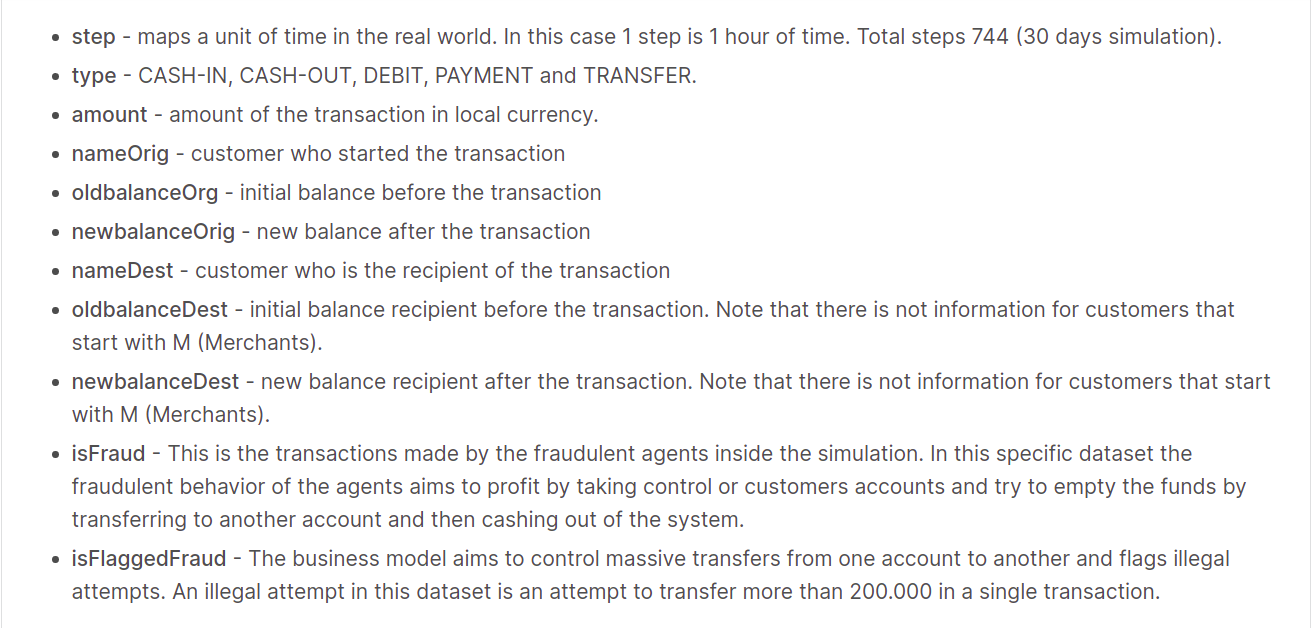

<h3>
Objective: To build a model that classifies the transaction as fraud or legitimate with very high confidence.</h3>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <h3>1. Data Preprocessing</h3>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,balanced_accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.tail(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362605,742,CASH_OUT,54652.46,C43545501,54652.46,0.0,C830041824,0.00,54652.46,1,0
6362606,742,TRANSFER,303846.74,C959102961,303846.74,0.0,C114421319,0.00,0.00,1,0
6362607,742,CASH_OUT,303846.74,C1148860488,303846.74,0.0,C846260566,343660.89,647507.63,1,0
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.0,C1744173808,0.00,0.00,1,0
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.0,C797688696,25176.67,283532.09,1,0
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0


In [ ]:
df.groupby(['step','type'])['amount'].sum()

step  type    
1     CASH_IN     8.550079e+07
      CASH_OUT    6.662978e+07
      DEBIT       6.636323e+05
      PAYMENT     8.337617e+06
      TRANSFER    1.242974e+08
                      ...     
741   TRANSFER    4.675177e+07
742   CASH_OUT    7.161868e+06
      TRANSFER    7.161868e+06
743   CASH_OUT    8.759913e+06
      TRANSFER    8.759913e+06
Name: amount, Length: 2729, dtype: float64

In [ ]:
#Dimension
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Cols: {}'.format(df.shape[1]))

Number of Rows: 6362620
Number of Cols: 11


In [ ]:
#Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#Checking null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#<h4><b> 1.1 Percentage of fraudulent activities</h4>

0    6354407
1       8213
Name: isFraud, dtype: int64


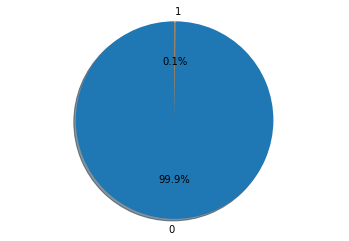

In [ ]:
#counting each categories
fraud_val = df.isFraud.value_counts()
print(fraud_val)
fig1, ax1 = plt.subplots()
ax1.pie(fraud_val.values, labels=fraud_val.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

 # <h4><b>1.2 Majority of Fraud activities occuring in which type of transaction</h4>

In [ ]:
trans_type = list(df.loc[df.isFraud == 1].type.drop_duplicates())
print('\n Types of fraudulent transactions are {}'.format(trans_type))


 Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


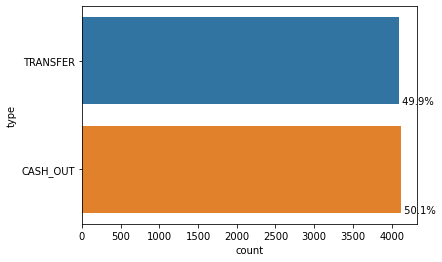

In [ ]:
x_label = df[df['isFraud'] == 1]
fig2 = sns.countplot(y='type' ,data=x_label)
total = x_label['type'].size
#print(total)
for p in fig2.patches:
    percentage = ' {:.1f}%'.format((100 * p.get_width())/total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()
    fig2.annotate(percentage, (x, y))



#<b> Insight: </b> 

Fraudulent activities occur in 2 types of transaction namely 'TRANSFER' & 'CASH_OUT'. Their percentage of occurance is nearly similar (49.9% and 50.1%).

# <h4><b> 1.3 Amount details of Fraud and non-Fraud transactions </h4>

In [ ]:
df.loc[(df.isFraud == 1) & (df.amount)]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


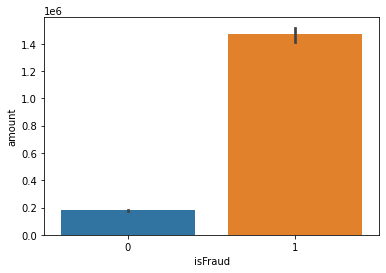

In [ ]:
fig3 = sns.barplot(y='amount', x='isFraud', data=df)
fig3

#<b> Insight: </b>

All Fraudulent activities has higher transaction amount transfers

# <h3><b> 2. Data Preparation</h3>

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# <h4> <b>2.1 One-hot Encoding</h4>

In [ ]:
X_ohe_type = pd.DataFrame(df['type'])

ohe = OneHotEncoder(sparse=False,
                          drop=None,
                          categories='auto',
                          handle_unknown='error')

#new_dataframe = ohe.fit_transform(X_ohe_type)
new_X_ohe = pd.DataFrame(ohe.fit_transform(X_ohe_type), 
columns=['CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER'])

In [ ]:
X =  df.drop(columns=['type'])
X = pd.concat([new_X_ohe,X], axis=1)

In [ ]:
X.isnull().sum()

CASH_IN           0
CASH_OUT          0
DEBIT             0
PAYMENT           0
TRANSFER          0
step              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
X.head(2)

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.0,0.0,0.0,1.0,0.0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,0.0,0.0,0.0,1.0,0.0,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


# <h4> <b>2.2 Dropping non-relevant features</h4>

In [ ]:
X = X.drop(columns=['isFraud', 'isFlaggedFraud','nameOrig','nameDest'], axis=1)
y = df['isFraud']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=123)
x_train.head(10)

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1629085,0.0,0.0,0.0,1.0,0.0,157,5530.25,0.00,0.00,0.00,0.00
3541982,0.0,1.0,0.0,0.0,0.0,260,110352.76,0.00,0.00,2574546.99,2684899.76
949059,0.0,0.0,0.0,1.0,0.0,44,5406.11,81630.00,76223.89,0.00,0.00
4931542,0.0,0.0,0.0,1.0,0.0,350,8221.22,3697.00,0.00,0.00,0.00
3171611,0.0,0.0,0.0,1.0,0.0,238,7787.64,82938.00,75150.36,0.00,0.00
142007,0.0,1.0,0.0,0.0,0.0,11,284143.55,0.00,0.00,1782863.81,2067007.36
428091,1.0,0.0,0.0,0.0,0.0,18,3883.36,7985473.15,7989356.51,4034.20,150.84
5424852,1.0,0.0,0.0,0.0,0.0,378,100402.27,20903.00,121305.27,1396501.49,1296099.23
2999817,1.0,0.0,0.0,0.0,0.0,232,98269.36,3683.00,101952.36,92502.21,0.00
1959991,0.0,1.0,0.0,0.0,0.0,178,89244.36,0.00,0.00,933732.35,1022976.71


In [ ]:
x_train.isnull().sum()

CASH_IN           0
CASH_OUT          0
DEBIT             0
PAYMENT           0
TRANSFER          0
step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64

# <h4> <b>2.3 Scaling</h4>

In [ ]:
num_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
mm = MinMaxScaler()

x_train[num_columns] = mm.fit_transform(x_train[num_columns])
x_test[num_columns] = mm.fit_transform(x_test[num_columns])

In [ ]:
x_train.head(2)

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1629085,0.0,0.0,0.0,1.0,0.0,157,0.000075,0.0,0.0,0.000000,0.000000
3541982,0.0,1.0,0.0,0.0,0.0,260,0.001495,0.0,0.0,0.007232,0.007538


#<h4> <b>2.4 SMOTE</h4>

In [ ]:
print(y_train.value_counts())

smt = SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)

0    5083516
1       6580
Name: isFraud, dtype: int64


<b>Since target variable 'isFraud' is highly biased, smoting is required to make the dataset more balanced

In [ ]:
print(y_train.value_counts())

0    5083516
1    5083516
Name: isFraud, dtype: int64


#<h3> <b>3. Logistic Regression</h3>

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr=lr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lr))

Confusion Matrix
[[1156310  114581]
 [    177    1456]]


In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95   1270891
           1       0.01      0.89      0.02      1633

    accuracy                           0.91   1272524
   macro avg       0.51      0.90      0.49   1272524
weighted avg       1.00      0.91      0.95   1272524



In [ ]:

print(balanced_accuracy_score(y_test, y_pred_lr))

0.9007262627527308


#<h3> <b>4. XGB Classifier</h3>

In [ ]:
xg = XGBClassifier()
xg.fit(x_train, y_train)
y_pred_xg = xg.predict(x_test)


[03:10:54] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95   1270891
           1       0.01      0.89      0.02      1633

    accuracy                           0.91   1272524
   macro avg       0.51      0.90      0.49   1272524
weighted avg       1.00      0.91      0.95   1272524



In [ ]:
print(balanced_accuracy_score(y_test, y_pred_xg))

0.974825275831251


 Since XG Boost model performs better, XGB classifier is selected.

# Insight:

Anomaly activities can be detected for financial transaction data with 98% confidence.